## Check the splirt data clustering

In [66]:
import os
os.environ["MPICH_GPU_SUPPORT_ENABLED"] = "0"
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table,join,Column,vstack
from pathlib import Path

import lsstypes as types

In [67]:
sys.path.append('../../scripts/')
import utils_4most as utils
sys.path.append('../')
from helper import SELECT_REGION
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.11/site-packages/healpy/visufunc.py:835: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


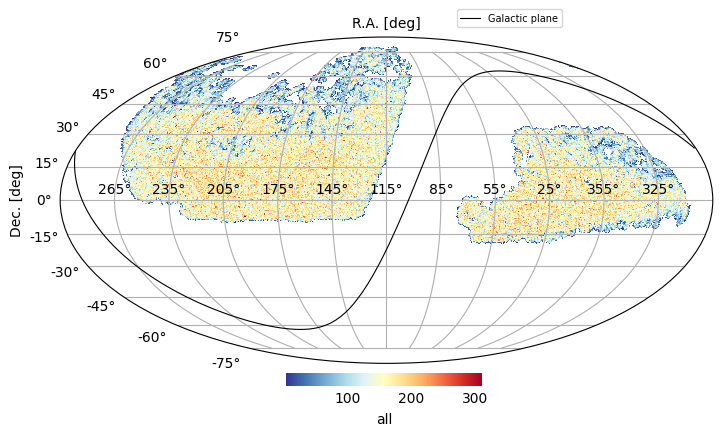

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.11/site-packages/healpy/visufunc.py:835: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


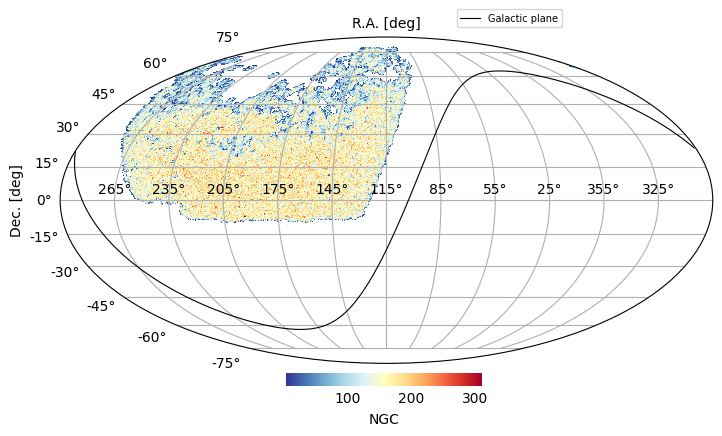

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.11/site-packages/healpy/visufunc.py:835: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


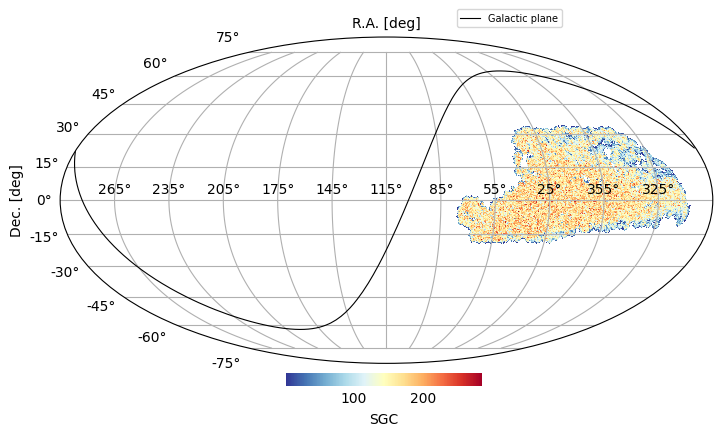

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.11/site-packages/healpy/visufunc.py:835: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


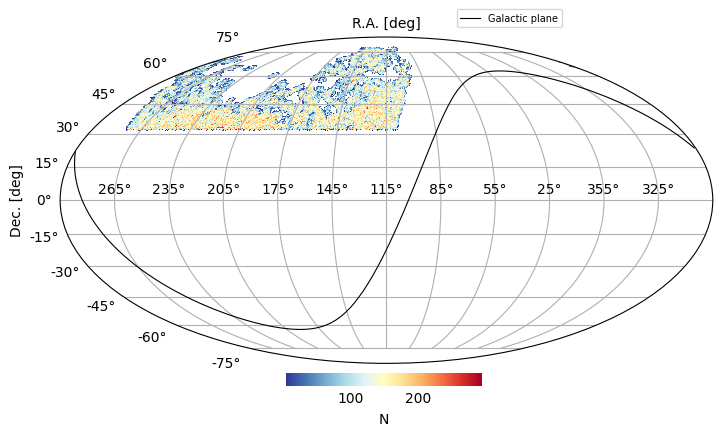

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.11/site-packages/healpy/visufunc.py:835: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


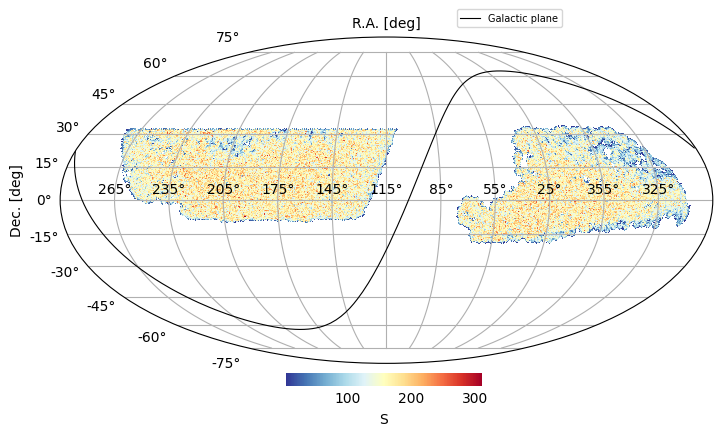

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.11/site-packages/healpy/visufunc.py:835: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


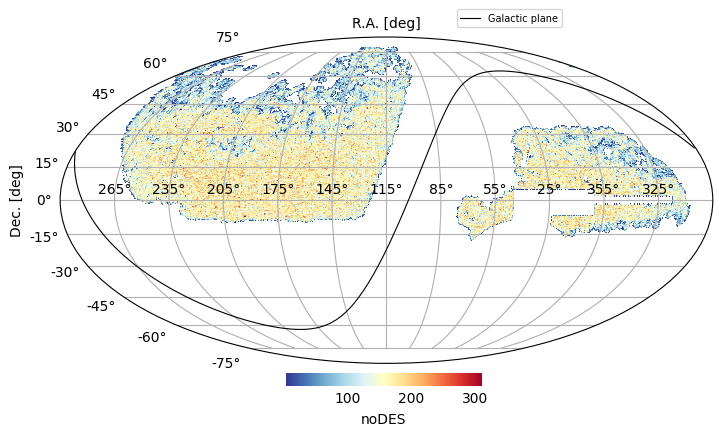

/global/homes/s/shengyu/.conda/envs/2pt_env/lib/python3.11/site-packages/healpy/visufunc.py:835: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  f = pylab.figure(fig, figsize=(8.5, 5.4))
/global/u1/s/shengyu/Y3/blinded_data_splits/main/notebooks/../../scripts/utils_4most.py:1174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


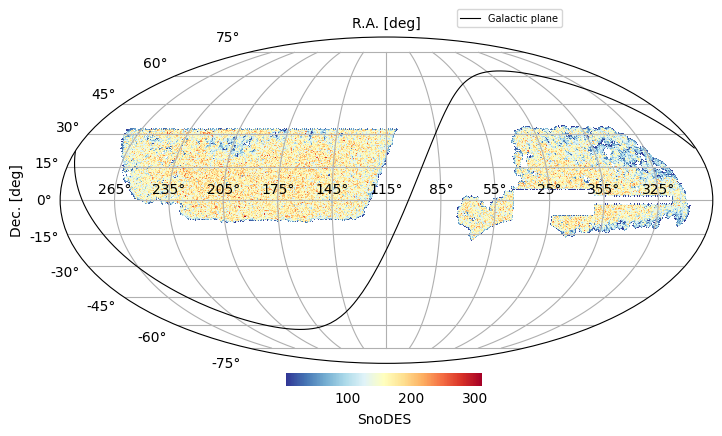

In [68]:
nside = 128

tracer = 'BGS'
if 'BGS' in tracer: tracer = 'BGS_BRIGHT-21.35'
# Read NGC + SGC
cat_ngc = Table.read('/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/QSO_NGC_clustering.dat.fits')
cat_sgc = Table.read('/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/QSO_SGC_clustering.dat.fits')

# Combine rows
cat_all = vstack([cat_ngc, cat_sgc], join_type='exact')  # or 'inner' / 'outer' if needed
hpmap = utils.create_hp_map(cat_all['RA'], cat_all['DEC'], nside=nside, weight=cat_all['WEIGHT_FKP'])
utils.plot_moll(hpmap, label='all')

for region in ['NGC', 'SGC' , 'N', 'S', 'noDES', 'SnoDES']:
    mask_re = SELECT_REGION(cat_all['RA'], cat_all['DEC'], region)
    cat_sel = cat_all[mask_re]
    hpmap = utils.create_hp_map(cat_sel['RA'], cat_sel['DEC'], nside=nside, weight=cat_sel['WEIGHT_FKP'])
    utils.plot_moll(hpmap, label=region)

In [25]:
cat_fn = '/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/QSO_SGC_clustering.dat.fits'

cat = Table.read(cat_fn)

np.mean(cat['WEIGHT_FKP'])

np.float64(0.8674770880671324)

In [26]:
cat_fn = '/dvs_ro/cfs/cdirs/desi/survey/catalogs/DA2/LSS/loa-v1/LSScats/v2/nonKP/QSO_NGC_clustering.dat.fits'

cat = Table.read(cat_fn)

np.mean(cat['WEIGHT_FKP'])

np.float64(0.8684883448977905)

In [2]:
def load_mesh2_spectrum_poles(filename):
    result = types.read(filename)
    k = result.get(ells=0).coords('k')
    Pk = {ell: result.get(ells=ell).values() for ell in result.ells}
    return k, Pk

In [ ]:
fn =  '/pscratch/sd/s/shengyu/Y3/blinded/test/window_mesh2_spectrum_poles_LRG_z0.4-0.6_GCcomb_default_fkp.h5'

result = types.read(fn)

zeff = 0
for pole in result.theory: zeff += pole._meta['z']


0.5096525952978979

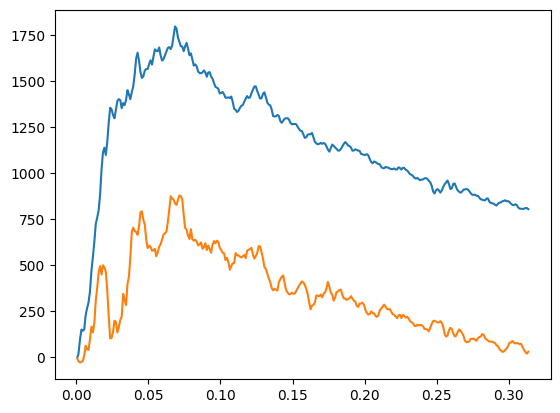

In [3]:
fn =  '/pscratch/sd/s/shengyu/Y3/blinded/test/mesh2_spectrum_poles_LRG_z0.4-0.6_NGC_default_fkp.h5'

k, Pk = load_mesh2_spectrum_poles(fn)

for ell in [0,2]:
    plt.plot(k,k*Pk[ell]['value'])

In [ ]:

def get_measurement_fn(kind='mesh2_spectrum_poles', version='test', recon=None, tracer='LRG', region='NGC', zrange=(0.8, 1.1), cut=None, auw=None, weight_type='default_fkp', **kwargs):
    # base_dir = Path(f'/global/cfs/projectdirs/desi/mocks/cai/mock-challenge-cutsky-dr2/')
    base_dir = Path('/pscratch/sd/s/shengyu/Y3/')
    base_dir = base_dir / (f'blinded_{recon}' if recon else 'blinded')
    if cut: cut = '_thetacut'
    else: cut = ''
    if auw: auw = '_auw'
    else: auw = ''
    return str(base_dir / f'{version}/{kind}_{tracer}_z{zrange[0]:.1f}-{zrange[1]:.1f}_{region}_{weight_type}{auw}{cut}.h5')


(kmin, kmax, kbin, lenk) = load_bins('pk', 'y3_blinding')

data = types.read(get_measurement_fn(**data_args, kind='mesh2_spectrum_poles')) 
window = types.read(get_measurement_fn(**data_args, kind='window_mesh2_spectrum_poles')) 
covariance = types.read(get_measurement_fn(**data_args, kind='covariance_mesh2_spectrum_poles')) 

ells = [0,2]
sl = slice(0, None, 5)  # rebin to dk = 0.005 h/Mpc
oklim = (0.02, 0.2)  # fitted k-range, no need to go to higher k
mean = data.select(k=sl).select(k=oklim).get(ells)
wmatrix = window.at.observable.match(mean).at.theory.match(data.select(k=(0., 1.1 * oklim[1])).get(ells))
covariance = covariance.at.observable.match(mean)

In [61]:
from blinded_data_pip import get_catalog_fn, get_clustering_positions_weights

catalog_args = dict(version='dr2-v2', region='NGC', tracer='LRG', zrange=(0.4,0.6), weight_type='defaul_fkp', nran=18)

region = 'N'
if region in ['NGC','SGC']:
    data_fn = get_catalog_fn(kind='data', **catalog_args)
    all_randoms_fn = get_catalog_fn(kind='randoms', **catalog_args)
elif region in ['N', 'S', 'noDES', 'SnoDES']:
    data_fn = [fn for cap in ['NGC', 'SGC'] for fn in get_catalog_fn(kind='data', **(catalog_args | {'region': cap}))]
    all_randoms_fn = [fn for cap in ['NGC', 'SGC'] for fn in get_catalog_fn(kind='randoms', **(catalog_args | {'region': cap}))]

In [62]:
pos = get_clustering_positions_weights(*data_fn, kind='data', **catalog_args)

ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.